In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import random
from sklearn.preprocessing import StandardScaler


In [ ]:
labels_csv=pd.read_csv('/content/drive/MyDrive/IML/Major Project/histopathologic-cancer-detection/train_labels.csv')

In [ ]:
import zipfile
z = zipfile.ZipFile('/content/drive/MyDrive/IML/Major Project/histopathologic-cancer-detection.zip')#self
z.extractall('.')

In [ ]:
labels_csv.id=labels_csv.id+'.tif'

# Exploratory Data Analysis


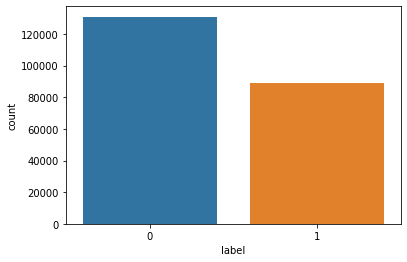

In [ ]:
sb.countplot(x='label',data=labels_csv)

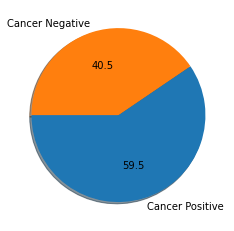

<Figure size 1584x1584 with 0 Axes>

In [ ]:
plt.pie(labels_csv.label.value_counts(), labels=['Cancer Positive', 'Cancer Negative'], startangle=180, 
        autopct='%1.1f', shadow=True)
plt.figure(figsize=(22,22))
plt.show()

In [ ]:
labels_csv.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835.tif,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif,1
2,755db6279dae599ebb4d39a9123cce439965282d.tif,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif,0
4,068aba587a4950175d04c680d38943fd488d6a9d.tif,0


In [ ]:
labels_csv.shape

(220025, 2)

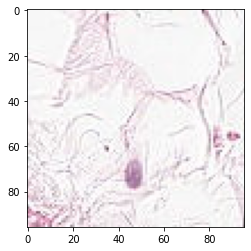

In [ ]:
folder_path = '/content/drive/MyDrive/IML/Major Project/histopathologic-cancer-detection (2)'
folder_path = '/content'
img = plt.imread(folder_path+'/train/d145b7714176a7f03838195d09e1bdf2eebf585b.tif')
plt.imshow(img)
plt.show()

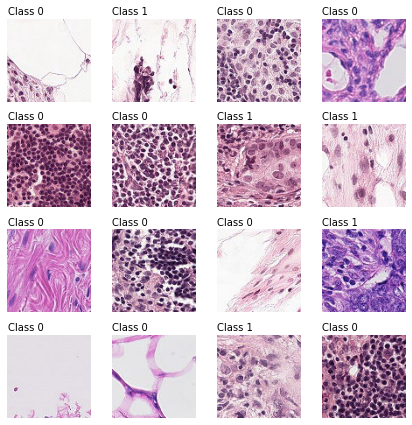

In [ ]:
plt.figure(figsize=(6,6))
folder_path = '/content'
for i in range(16):

    img = plt.imread(folder_path+'/train/'+str(labels_csv.id[i]))    
    label =labels_csv.label[i] 

    plt.subplot(4,4,i+1)
    plt.imshow(img)
    plt.text(0, -5, f'Class {label}', color='k')
        
    plt.axis('off')

plt.tight_layout()
plt.show()

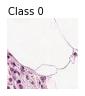

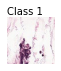

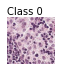

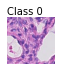

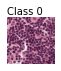

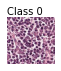

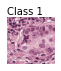

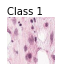

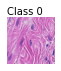

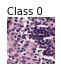

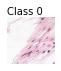

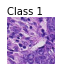

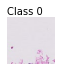

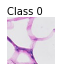

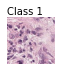

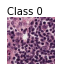

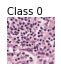

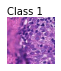

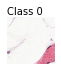

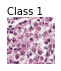

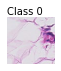

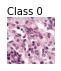

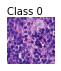

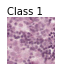

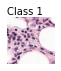

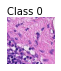

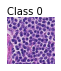

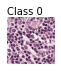

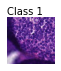

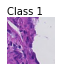

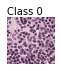

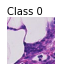

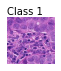

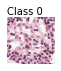

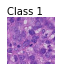

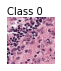

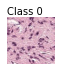

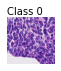

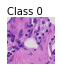

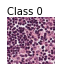

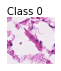

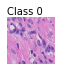

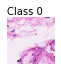

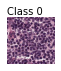

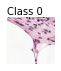

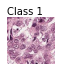

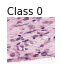

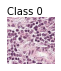

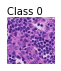

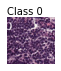

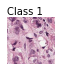

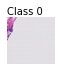

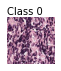

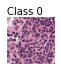

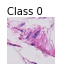

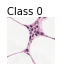

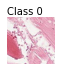

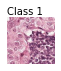

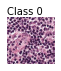

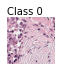

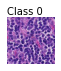

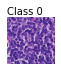

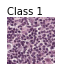

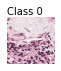

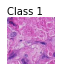

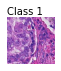

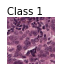

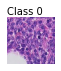

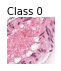

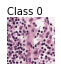

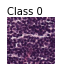

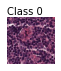

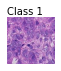

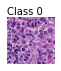

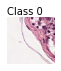

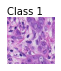

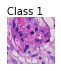

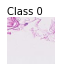

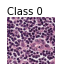

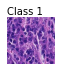

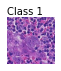

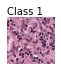

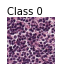

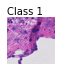

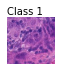

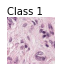

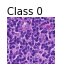

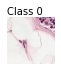

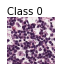

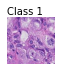

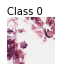

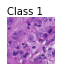

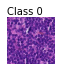

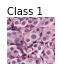

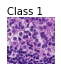

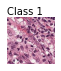

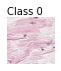

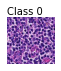

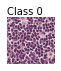

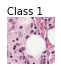

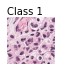

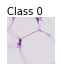

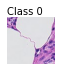

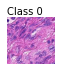

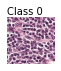

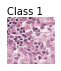

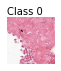

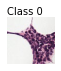

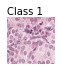

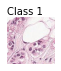

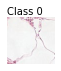

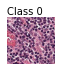

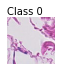

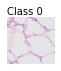

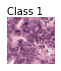

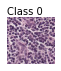

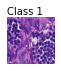

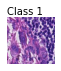

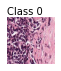

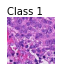

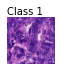

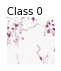

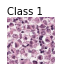

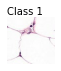

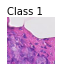

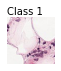

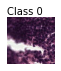

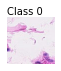

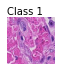

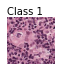

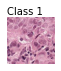

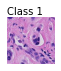

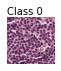

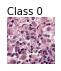

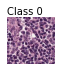

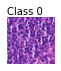

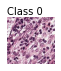

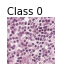

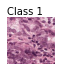

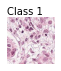

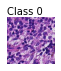

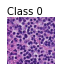

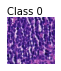

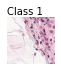

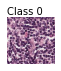

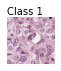

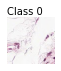

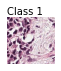

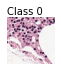

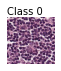

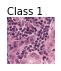

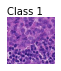

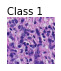

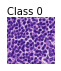

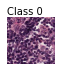

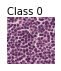

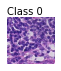

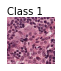

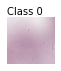

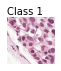

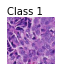

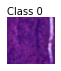

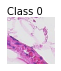

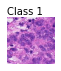

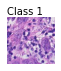

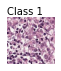

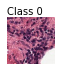

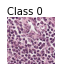

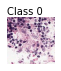

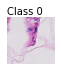

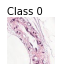

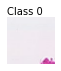

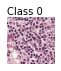

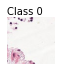

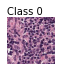

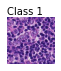

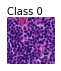

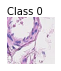

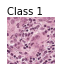

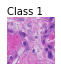

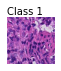

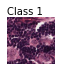

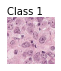

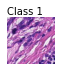

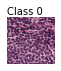

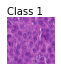

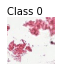

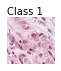

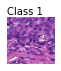

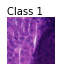

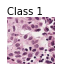

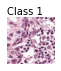

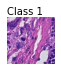

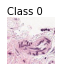

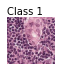

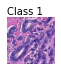

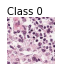

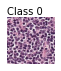

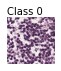

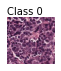

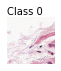

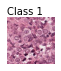

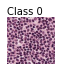

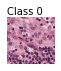

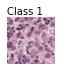

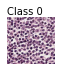

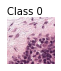

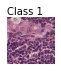

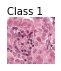

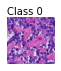

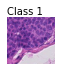

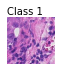

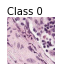

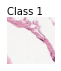

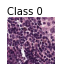

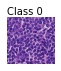

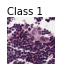

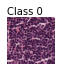

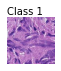

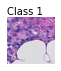

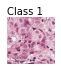

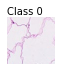

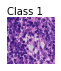

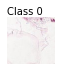

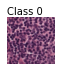

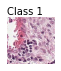

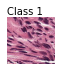

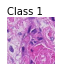

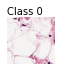

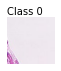

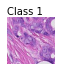

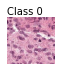

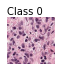

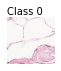

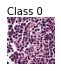

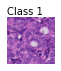

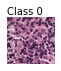

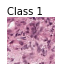

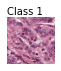

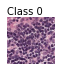

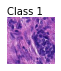

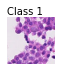

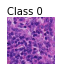

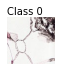

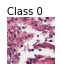

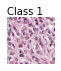

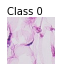

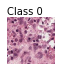

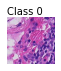

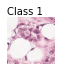

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(6,6))
folder_path = '/content'
for i in range(250):

    img = plt.imread(folder_path+'/train/'+str(labels_csv.id[i]))    
    label =labels_csv.label[i] 

    plt.subplot(4,4,(i)%16+1)
    plt.imshow(img)
    plt.text(0, -5, f'Class {label}', color='k')
        
    plt.axis('off')
    plt.show()
plt.tight_layout()
plt.show()

In [ ]:
labels_negative=labels_csv[labels_csv['label']==0]
len(labels_negative)

130908

In [ ]:
labels_positive=labels_csv[labels_csv['label']==1]
len(labels_positive)

89117

# Data Preprocessing and Cleaning

In [51]:
!pip install opencv-python
import cv2
import lightgbm
import glob

In [ ]:
RESIZE_SHAPE = (128, 128)
def normalized_read(paths):
    all_images = []
    for i in range(len(paths)):
        #print(path)
        img = cv2.imread(paths[i])
        grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        normalized_img = cv2.resize(grayscale, RESIZE_SHAPE)
        all_images.append(normalized_img.flatten())
    return np.array(all_images)

def show_img(img):
    return plt.imshow(np.reshape(img, RESIZE_SHAPE), cmap='pink')

In [ ]:
train = glob.glob("/content/train/*")
test = glob.glob("/content/test/*")

In [ ]:
train_dataset_w = normalized_read(train)
test_dataset_w = normalized_read(test)

In [ ]:
train_dataset_w

array([[116, 101, 103, ..., 162, 176, 159],
       [221, 202, 175, ..., 129, 134, 149],
       [ 43,  45,  66, ..., 193, 193, 214],
       ...,
       [136, 120, 101, ..., 120, 124, 170],
       [144, 209, 239, ..., 137,  99,  97],
       [154, 112,  79, ...,  81, 159, 243]], dtype=uint8)

In [ ]:
test_dataset_w

array([[137,  93,  60, ..., 199, 215, 211],
       [125, 134, 140, ..., 159, 146, 130],
       [ 97,  81,  93, ..., 148, 164, 190],
       ...,
       [140, 125, 128, ..., 144, 136, 116],
       [ 97,  96,  80, ...,  56,  73,  96],
       [194, 203, 195, ...,  76,  92, 128]], dtype=uint8)

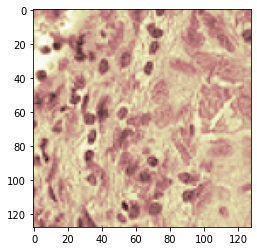

In [ ]:
show_img(train_dataset_w[0])

In [ ]:
from sklearn.model_selection import train_test_split
train_dataset = pd.DataFrame(train_dataset_w)
train_dataset['label']=labels_csv['label'].copy()
train_dataset


,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,116,101,103,121,125,111,104,108,107,107,...,156,135,157,162,143,126,162,176,159,0
1,221,202,175,155,200,204,185,166,213,199,...,169,168,174,171,156,138,129,134,149,1
2,43,45,66,109,171,217,236,234,232,237,...,240,207,197,187,178,209,193,193,214,0
3,68,63,56,49,59,74,81,80,82,78,...,119,123,120,116,113,111,107,107,111,0
4,158,161,135,89,87,109,123,119,93,134,...,166,163,138,118,111,115,129,140,146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220020,192,124,87,98,118,122,133,150,152,179,...,174,152,138,119,99,108,107,143,206,0
220021,48,30,27,41,45,97,137,153,163,175,...,96,88,64,56,62,53,83,89,70,1
220022,136,120,101,87,107,111,121,139,155,160,...,133,94,80,76,87,149,120,124,170,0
220023,144,209,239,216,178,203,223,214,140,197,...,74,77,139,192,218,200,137,99,97,0


In [ ]:
train_dataset=train_dataset.iloc[0:12500,:]
train_negative=train_dataset[train_dataset['label']==0]
train_positive=train_dataset[train_dataset['label']==1]
df=train_positive.iloc[0:3000,:].append(train_negative.iloc[0:300,:])
X=df.iloc[:,:]
y=df.iloc[:,-1]
# X=train_dataset.iloc[:,:]
# y=train_dataset.iloc[:,-1]
X

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
1,221,202,175,155,200,204,185,166,213,199,...,169,168,174,171,156,138,129,134,149,1
6,209,213,206,193,214,220,217,210,213,215,...,63,81,88,81,70,93,125,129,108,1
7,213,203,198,196,175,163,172,194,202,202,...,215,220,217,214,214,227,225,208,184,1
11,73,113,142,151,158,145,162,201,177,154,...,179,139,161,173,161,135,161,181,183,1
14,134,152,161,158,164,157,139,119,132,147,...,147,168,146,123,105,71,48,35,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,115,75,45,36,49,91,124,150,226,150,...,32,65,142,180,170,161,159,169,187,0
500,181,172,160,154,184,163,145,144,175,151,...,197,154,131,98,69,139,125,115,124,0
502,224,160,107,81,66,45,50,88,151,123,...,152,131,113,95,79,70,86,112,138,0
503,106,133,149,147,137,145,155,168,204,188,...,160,185,199,188,156,147,175,199,210,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=4555)

In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit
# df1=train_dataset.iloc[0:5000,:]
# X1=df.iloc[:,:]
# y1=df.iloc[:,-1]
# sss=StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state=9)
# for train_index, test_index in sss.split(X1, y1):
#     X_train, X_test = X1[train_index], X1[test_index]
#     y_train, y_test = y1[train_index], y1[test_index]

In [ ]:
x_train=x_train.drop(['label'],axis=1)
x_test=x_test.drop(['label'],axis=1)
#x_train

# Preliminary Testing of models

In [ ]:
from sklearn.metrics import roc_auc_score 
lgbc=lightgbm.LGBMClassifier()
lgbc.fit(x_train,y_train)

LGBMClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 
train_pred=lgbc.predict(x_train)
train_acc=accuracy_score(train_pred,y_train)
print("Training Accuracy:",train_acc)
test_pred=lgbc.predict(x_test)
test_acc=accuracy_score(test_pred,y_test)
print("Test Accuracy:",test_acc)

Train Accuracy: 0.9666666666666667
Test accuracy: 0.91373737373738


In [ ]:
import xgboost as xgb
xgbc=xgb.XGBClassifier()
xgbc.fit(x_train,y_train)

XGBClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 
train_pred=xgbc.predict(x_train)
train_acc=accuracy_score(train_pred,y_train)
print("Training Accuracy:",train_acc)
test_pred=xgbc.predict(x_test)
test_acc=accuracy_score(test_pred,y_test)
print("Test Accuracy:",test_acc)

Training Accuracy: 0.9692640692640693
Test Accuracy: 0.9


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print("Training Accuracy:",accuracy_score(gnb.predict(x_train),y_train))
print("Test Accuracy:",accuracy_score(gnb.predict(x_test),y_test))

Training Accuracy: 0.5193548387096775
Test Accuracy: 0.5225806451612903


# Training Models

# Cnn

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization ,GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

In [ ]:
from tensorflow.keras.applications.inception_v3 import  preprocess_input ,InceptionV3
from tensorflow.keras.applications.mobilenet import preprocess_input , MobileNet
import tensorflow as tf
labels_csv['label'] = labels_csv['label'].astype('str')
idg = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rescale=1./245.0,rotation_range=10,validation_split = 0.2)
train_generator = idg.flow_from_dataframe(
            dataframe=labels_csv,
            directory="/content/train/",
            x_col="id",
            y_col="label",
            subset="training",
            batch_size=128,
            seed=42,
            shuffle=True,
            class_mode="binary",
            target_size=(96,96))
test_generator = idg.flow_from_dataframe(
            dataframe=labels_csv,
            directory="/content/train/",
            x_col="id",
            y_col="label",
            subset="validation",
            batch_size=128,
            seed=36,
            shuffle=True,
            class_mode="binary",
            target_size=(96,96))

Found 176020 validated image filenames belonging to 2 classes.
Found 44005 validated image filenames belonging to 2 classes.


In [ ]:
adam_opt=Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.99)
model=Sequential([
                  Conv2D(64,3,activation='relu',kernel_initializer='he_normal',input_shape=(96,96,3)),
                  BatchNormalization(),
                  Conv2D(128,3,activation='relu'),
                  BatchNormalization(),
                  MaxPooling2D(3),
                  Conv2D(256,3,activation='sigmoid'),
                  BatchNormalization(),
                  MaxPooling2D(3),
                  Conv2D(512,3,padding='valid',activation='relu'),
                  BatchNormalization(),
                  GlobalMaxPool2D(),
                  Flatten(),
                  Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                  BatchNormalization(),
                  Dense(1024,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                  BatchNormalization(),
                  Dense(1,activation='sigmoid',kernel_initializer='glorot_normal')
                  
])

model.compile(optimizer=adam_opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 94, 94, 64)        1792      
                                                                 
 batch_normalization_6 (Batc  (None, 94, 94, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_23 (Conv2D)          (None, 92, 92, 128)       73856     
                                                                 
 batch_normalization_7 (Batc  (None, 92, 92, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                      

In [ ]:
earlystopper = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, restore_best_weights=True)
reducel = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.1)

In [ ]:
history=model.fit_generator(generator=train_generator,validation_data=test_generator,epochs=10,
                  steps_per_epoch=len(train_generator)//128,validation_steps=len(test_generator)//128,
                  callbacks=[earlystopper,reducel], verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
10/10 [==============================] - 211s 20s/step - loss: 0.8111 - accuracy: 0.7867 - val_loss: 30.5454 - val_accuracy: 0.5938 - lr: 1.0000e-03
Epoch 2/10
10/10 [==============================] - 190s 19s/step - loss: 0.7870 - accuracy: 0.7930 - val_loss: 7.5363 - val_accuracy: 0.5703 - lr: 1.0000e-03
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.7622 - accuracy: 0.8047 
Epoch 3: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.
10/10 [==============================] - 190s 19s/step - loss: 0.7622 - accuracy: 0.8047 - val_loss: 1.2432 - val_accuracy: 0.5273 - lr: 1.0000e-03
Epoch 4/10
10/10 [==============================] - 191s 19s/step - loss: 0.7192 - accuracy: 0.8234 - val_loss: 1.4775 - val_accuracy: 0.5938 - lr: 1.0000e-04
Epoch 4: early stopping


#Model 1)(Tuning)

In [ ]:
train_generator2 = idg.flow_from_dataframe(
            dataframe=labels_csv,
            directory="/content/train/",
            x_col="id",
            y_col="label",
            subset="training",
            batch_size=128,
            seed=42,
            shuffle=True,
            class_mode="binary",
            target_size=(64,64))
test_generator2 = idg.flow_from_dataframe(
            dataframe=labels_csv,
            directory="/content/train/",
            x_col="id",
            y_col="label",
            subset="validation",
            batch_size=128,
            seed=36,
            shuffle=True,
            class_mode="binary",
            target_size=(64,64))

In [ ]:
model2 = Sequential()
model2.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (64, 64, 3)))
model2.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model2.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(MaxPooling2D(pool_size=(3,3)))
model2.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model2.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model2.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model2.add(Dropout(0.3))
model2.add(MaxPooling2D(pool_size=(3,3)))
model2.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model2.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model2.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(MaxPooling2D(pool_size=(3,3)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 21, 21, 64)        18496     
                                                      

In [ ]:
model2.compile(optimizer='adam' , loss='binary_crossentropy', metrics=['accuracy'])
history2=model2.fit(train_generator2,validation_data=test_generator2,epochs=15,
                  steps_per_epoch=100,validation_steps=50,
                  callbacks=[earlystopper,reducel], verbose=1)

Epoch 1/15
100/100 [==============================] - 452s 5s/step - loss: 0.5592 - accuracy: 0.7174 - val_loss: 0.6293 - val_accuracy: 0.7425 - lr: 0.0010
Epoch 2/15
100/100 [==============================] - 483s 5s/step - loss: 0.4797 - accuracy: 0.7845 - val_loss: 0.5824 - val_accuracy: 0.7531 - lr: 0.0010
Epoch 3/15
100/100 [==============================] - 430s 4s/step - loss: 0.4572 - accuracy: 0.7943 - val_loss: 0.5487 - val_accuracy: 0.7722 - lr: 0.0010
Epoch 4/15
100/100 [==============================] - 429s 4s/step - loss: 0.4451 - accuracy: 0.8004 - val_loss: 0.5462 - val_accuracy: 0.7677 - lr: 0.0010
Epoch 5/15
100/100 [==============================] - 428s 4s/step - loss: 0.4420 - accuracy: 0.8015 - val_loss: 0.4866 - val_accuracy: 0.8156 - lr: 0.0010
Epoch 6/15
100/100 [==============================] - 435s 4s/step - loss: 0.4186 - accuracy: 0.8150 - val_loss: 0.4569 - val_accuracy: 0.8192 - lr: 0.0010
Epoch 7/15
100/100 [==============================] - 446s 4s/st

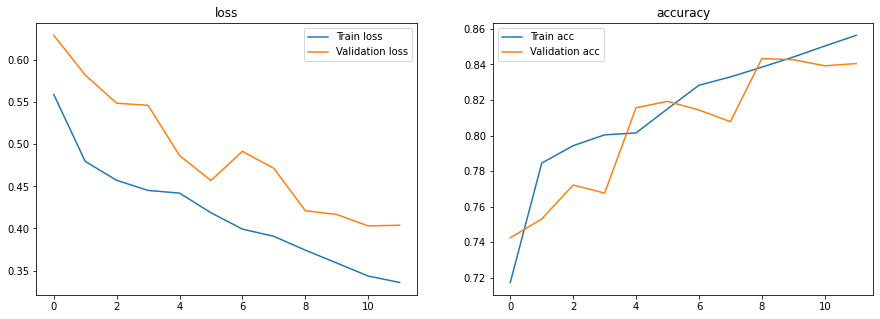

In [ ]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()
show_final_history(history2)

# Model 2(final)


In [ ]:
labels_csv_str=labels_csv.copy()
labels_csv_str['label'] = labels_csv_str['label'].astype('str')
train_df1 = idg.flow_from_dataframe(dataframe=labels_csv_str,directory="/content/train/",x_col="id",y_col="label",subset="training",batch_size=128,
            seed=42,
            shuffle=True,
            class_mode="binary",
            target_size=(64,64))

test_df1 = idg.flow_from_dataframe(dataframe=labels_csv_str,directory="/content/train/", x_col="id", y_col="label", subset="validation", batch_size=128,
            seed=36,
            shuffle=True,
            class_mode="binary",
            target_size=(64,64))

Found 176020 validated image filenames belonging to 2 classes.
Found 44005 validated image filenames belonging to 2 classes.


In [ ]:
model1 = Sequential()
model1.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (64, 64, 3)))
model1.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model1.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(MaxPooling2D(pool_size=(3,3)))
model1.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model1.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model1.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model1.add(Dropout(0.3))
model1.add(MaxPooling2D(pool_size=(3,3)))
model1.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model1.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model1.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model1.add(Dropout(0.5))
model1.add(MaxPooling2D(pool_size=(3,3)))
model1.add(Flatten())
model1.add(Dense(128, activation='sigmoid'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='relu'))
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_27 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 conv2d_28 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 dropout_8 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 21, 21, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 21, 21, 64)        18496     
                                                      

In [ ]:
adam_opt=Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.99)
model2.compile(optimizer='adam' , loss='binary_crossentropy', metrics=['accuracy'])
model2_info=model2.fit(train_df1,validation_data=test_df1,epochs=10,
                  steps_per_epoch=70,validation_steps=50,
                  callbacks=[earlystopper,reducel], verbose=1)


Epoch 1/10
70/70 [==============================] - 390s 6s/step - loss: 0.4454 - accuracy: 0.8058 - val_loss: 0.4433 - val_accuracy: 0.8259 - lr: 0.0010
Epoch 2/10
70/70 [==============================] - 313s 4s/step - loss: 0.3934 - accuracy: 0.8291 - val_loss: 0.4496 - val_accuracy: 0.8230 - lr: 0.0010
Epoch 3/10
70/70 [==============================] - ETA: 0s - loss: 0.3956 - accuracy: 0.8242
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
70/70 [==============================] - 313s 4s/step - loss: 0.3956 - accuracy: 0.8242 - val_loss: 0.4273 - val_accuracy: 0.8195 - lr: 0.0010
Epoch 4/10
70/70 [==============================] - 347s 5s/step - loss: 0.3572 - accuracy: 0.8413 - val_loss: 0.4220 - val_accuracy: 0.8314 - lr: 1.0000e-04
Epoch 5/10
70/70 [==============================] - 311s 4s/step - loss: 0.3472 - accuracy: 0.8476 - val_loss: 0.4052 - val_accuracy: 0.8394 - lr: 1.0000e-04
Epoch 6/10
70/70 [==============================] - 314s 4s/st

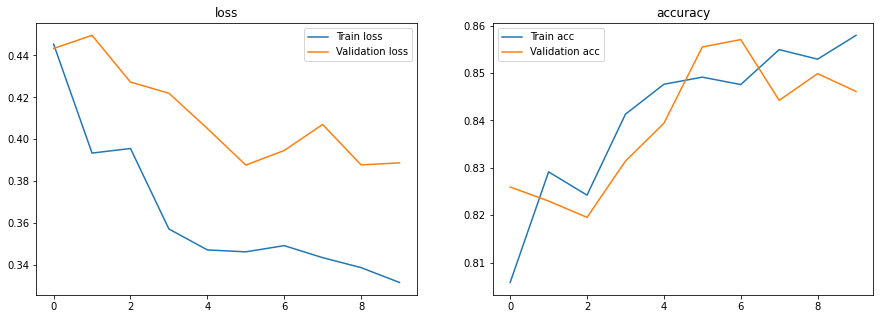

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('loss')
ax[0].plot(model2_info.epoch, model2_info.history["loss"], label="Train loss")
ax[0].plot(model2_info.epoch, model2_info.history["val_loss"], label="Validation loss")
ax[1].set_title('accuracy')
ax[1].plot(model2_info.epoch, model2_info.history["accuracy"], label="Train acc")
ax[1].plot(model2_info.epoch, model2_info.history["val_accuracy"], label="Validation acc")
ax[0].legend()
ax[1].legend()
plt.show()

#  XGBoost

In [ ]:
import xgboost as xgb
xgbc=xgb.XGBClassifier()
xgbc.fit(x_train,y_train)

XGBClassifier()

In [ ]:
import joblib 
joblib.dump(xgbc,'xgbc.pkl')

['xgbc.pkl']

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 
train_pred=xgbc.predict(x_train)
train_acc=accuracy_score(train_pred,y_train)
print("Training Accuracy:",train_acc)
test_pred=xgbc.predict(x_test)
test_acc=accuracy_score(test_pred,y_test)
print("Test Accuracy:",test_acc)

Training Accuracy: 0.9692640692640693
Test Accuracy: 0.9


In [ ]:
#from sklearn.tree import DecisionTreeRegressor as dtr
import xgboost as xgb
from sklearn.metrics import mean_squared_error as mse
l_xgb=[]
v_xgb=[]
d_xgb=[]
n_xgb=[]
verb=[0,1,2,3]
nest=[100,300,600,800,1000,2000]
splitter=["best", "random"]
best_verb,best_splitter,best_depth,best_n,acc_max=None,None,None,None,0
for v in verb:
  for depth in range(4,30):
      for n in nest: 
        decision_model=xgb.XGBClassifier(verbosity=v,max_depth=depth,n_estimators=n)
        decision_model.fit(x_train,y_train)
        acc=accuracy_score(y_test,decision_model.predict(x_test))
        l_xgb.append(acc)
        v_xgb.append(v)
        d_xgb.append(depth)
        n_xgb.append(n)
        if (acc>acc_max):
          acc_max=acc
          best_verb=v
          best_depth=depth
          best_n=n
          
          



In [ ]:
print("The best verbosity is:",best_verb)
print("The best depth:",best_depth)
print("Best n_estimators val is:",best_n)

The best verbosity is: 0
The best depth: 4
Best n_estimators val is: 1000


In [ ]:
import xgboost as xgb
xgbc=xgb.XGBClassifier(verbosity=best_verb,max_depth=best_depth,n_estimators=best_n)
xgbc.fit(x_train,y_train)
xgbc.fit(x_train,y_train)
train_pred=xgbc.predict(x_train)
train_acc=accuracy_score(train_pred,y_train)
print("Training Accuracy:",train_acc)
test_pred=xgbc.predict(x_test)
test_acc=accuracy_score(test_pred,y_test)
print("Test Accuracy:",test_acc)

Training Accuracy: 0.969895613428
Test Accuracy: 0.908608848721


# LightGBM

In [ ]:
import lightgbm 
from sklearn.metrics import roc_auc_score 
lgbc=lightgbm.LGBMClassifier()
lgbc.fit(x_train,y_train)

LGBMClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 
train_pred=lgbc.predict(x_train)
train_acc=accuracy_score(train_pred,y_train)
print("Train Accuracy:",train_acc)
test_pred=lgbc.predict(x_test)
test_acc=accuracy_score(test_pred,y_test)
print("Test Accuracy:",test_acc)

Train Accuracy: 0.9666666666666667
Test accuracy: 0.91373737373738


In [ ]:

from sklearn.metrics import mean_squared_error as mse
l_lgb=[]
v_lgb=[]
d_lgb=[]
n_lgb=[]
verb=[0,1,2,3]
nest=[100,300,600,800,1000,2000]
splitter=["best", "random"]
best_verb2,best_splitter,best_depth2,best_n2,acc_max=None,None,None,None,0
for v in verb:
  for depth in range(4,30):
      for n in nest: 
        decision_model=lightgbm.LGBMClassifier(verbosity=v,max_depth=depth,n_estimators=n)
        decision_model.fit(x_train,y_train)
        acc=accuracy_score(y_test,decision_model.predict(x_test))
        l_lgb.append(acc)
        v_lgb.append(v)
        d_lgb.append(depth)
        n_lgb.append(n)
        if (acc>acc_max):
          acc_max=acc
          best_verb2=v
          best_depth2=depth
          best_n2=n

In [ ]:
print('The best verbosity is:',best_verb2)
print('The best depth is:',best_depth2)
print('Best n_estimators val is:',best_n2)

The best verbosity is: 1
The best depth is: 7
Best n_estimators val is: 2000


In [ ]:
import lightgbm 
lgbc=lightgbm.LGBMClassifier(verbosity=best_verb2,max_depth=best_depth2,n_estimators=best_n2)
lgbc.fit(x_train,y_train)
lgbc.fit(x_train,y_train)
train_pred=lgbc.predict(x_train)
train_acc=accuracy_score(train_pred,y_train)
print("Training Accuracy:",train_acc)
test_pred=lgbc.predict(x_test)
test_acc=accuracy_score(test_pred,y_test)
print("Test Accuracy:",test_acc)


Training Accuracy: 0.9666666666666667
Test accuracy: 0.924711156565657
